#Experiment-3


In [1]:
import numpy as np
import cv2

image = cv2.imread("hogwarts.jpg", cv2.IMREAD_GRAYSCALE)
# cv2.imshow("Displayed Image",image)

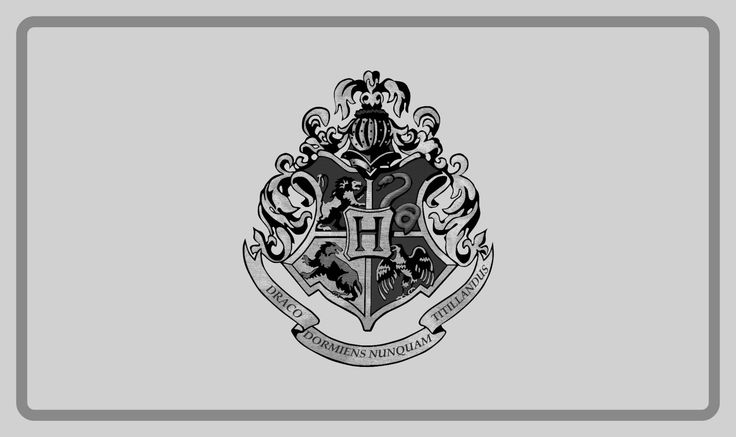

In [2]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [7]:
print("Size of image: ",image.shape)
print("Datatype of image: ",image.dtype)
print("Channels of image: ",image.ndim)
print("Total number of pixels (Size of image):",image.size)

Size of image:  (437, 736)
Datatype of image:  uint8
Channels of image:  2
Total number of pixels (Size of image): 321632


### Low Pass Averaging Filter on Gaussian Noise

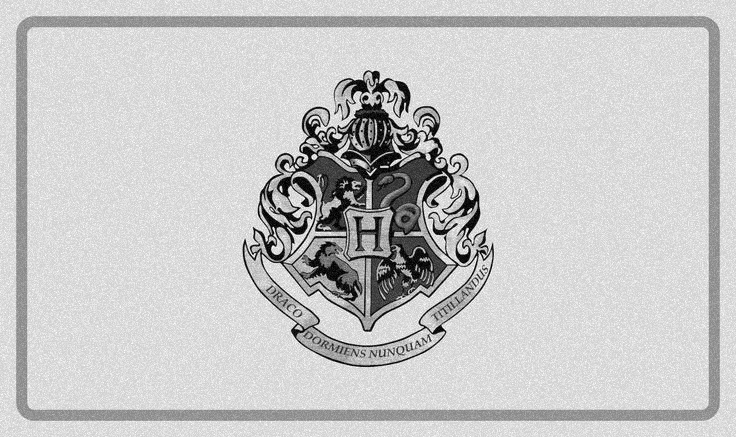

In [8]:
gaussian_noise = np.zeros(image.shape[:2], dtype="uint8")
cv2.randn(gaussian_noise, 10, 10)
gausssian_noise_image = cv2.add(image, gaussian_noise)
cv2_imshow(gausssian_noise_image)

In [9]:
avg_mask = np.ones([3,3], dtype=int)
avg_mask = avg_mask / 9
avg_filter_img = np.zeros(image.shape[:2], dtype="uint8")

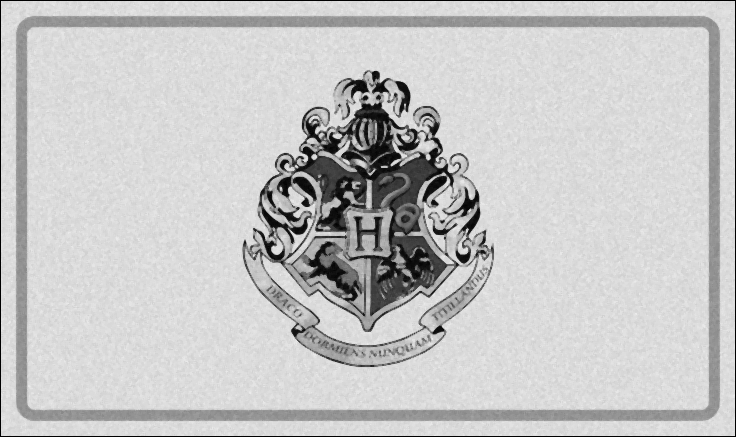

In [10]:
test = np.zeros(image.shape[:2], dtype="uint8")
for i in range(1, gausssian_noise_image.shape[0]-1):
  for j in range(1, gausssian_noise_image.shape[1]-1):
     test[i,j] = np.median(gausssian_noise_image[i-1:i+2,j-1:j+2])

cv2_imshow(test)

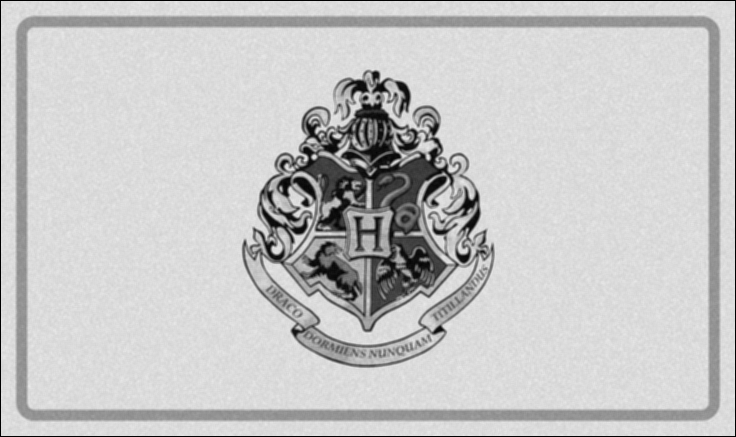

In [11]:
for i in range(1, image.shape[0]-1):
  for j in range(1, image.shape[1]-1):
     avg_filter_img[i,j] = gausssian_noise_image[i-1,j-1]*avg_mask[0,0] + gausssian_noise_image[i-1,j]*avg_mask[0,1] + gausssian_noise_image[i-1,j+1]*avg_mask[0,2] + gausssian_noise_image[i,j-1]*avg_mask[1,0] + gausssian_noise_image[i,j]*avg_mask[1,1] + gausssian_noise_image[i,j+1]*avg_mask[1,2] + gausssian_noise_image[i+1,j-1]*avg_mask[2,0] + gausssian_noise_image[i+1,j]*avg_mask[2,1] + gausssian_noise_image[i+1,j+1]*avg_mask[2,2]

cv2_imshow(avg_filter_img)

### Low Pass Median Filter on Salt & Pepper Noise

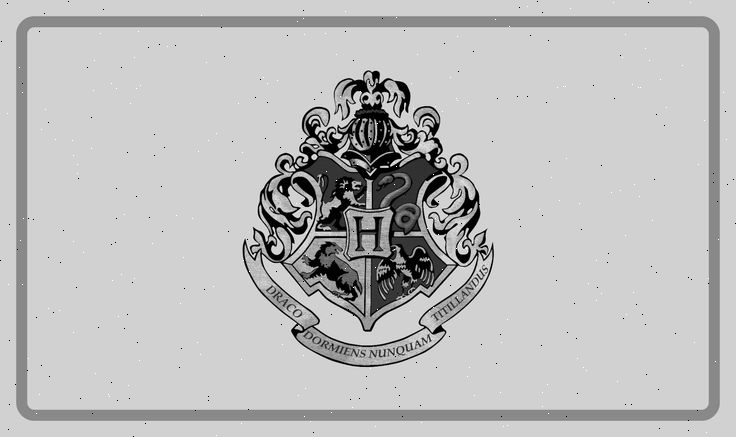

In [12]:
import random

sp_noise_img = image.copy()
for i in range(200):
    x = random.randint(0, image.shape[0]-1)
    y = random.randint(0, image.shape[1]-1)
    sp_noise_img[x,y] = 255

for i in range(200):
    x = random.randint(0, image.shape[0]-1)
    y = random.randint(0, image.shape[1]-1)
    sp_noise_img[x,y] = 0


cv2_imshow(sp_noise_img)

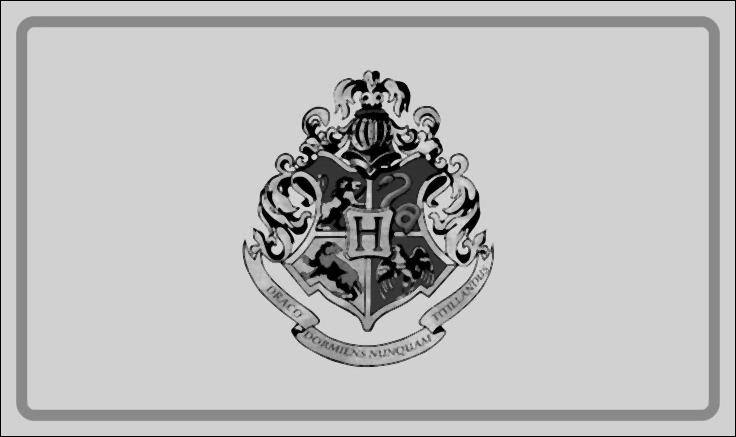

In [14]:
median_filter_img = np.zeros(image.shape[:2], dtype="uint8")
for i in range(1, sp_noise_img.shape[0]-1):
  for j in range(1, sp_noise_img.shape[1]-1):
     median_filter_img[i,j] = np.median(sp_noise_img[i-1:i+2,j-1:j+2])

cv2_imshow(median_filter_img)